(a) Analyse the Michaelis-Menten Equation. What is the meaning of Km and
Vmax?

(b) Why can we assume Vmax = Etotal ∗ k2?


(c) We already noted that [S] >> [E]. Now assume that we are in the unlikely
event where [E] >> [S]. Does the assumption Vmax = Etotal ∗k2 still stand?
Explain this.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [3]:
def michaelis_menten(S_list, Km, Vmax):
    """
    This function takes a list of substrate concentrations, 
    a Michaelis-Menten constant, and a maximum reaction rate, 
    and returns a list of reaction rates.
    """
    V_list = []
    for S in S_list:
        V = (Vmax * S) / (Km + S)
        V_list.append(V)
    return V_list

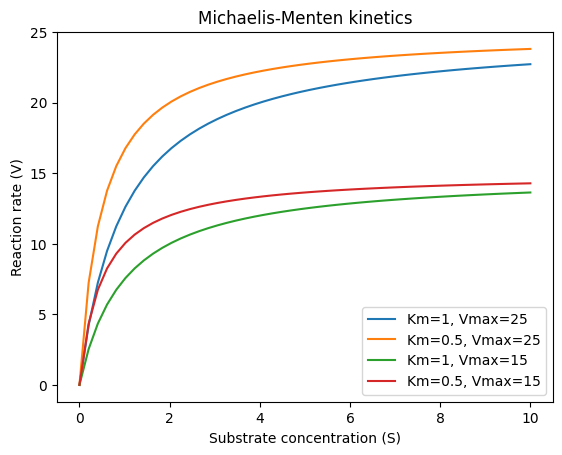

In [4]:
Km1 = 1
Km2 = 0.5
Vmax1 = 25
Vmax2 = 15
S_list = np.linspace(0, 10, 50)
V_list_1 = michaelis_menten(S_list, Km1, Vmax1)
V_list_2 = michaelis_menten(S_list, Km2, Vmax1)
V_list_3 = michaelis_menten(S_list, Km1, Vmax2)
V_list_4 = michaelis_menten(S_list, Km2, Vmax2)

plt.plot(S_list, V_list_1, label='Km=1, Vmax=25')
plt.plot(S_list, V_list_2, label='Km=0.5, Vmax=25')
plt.plot(S_list, V_list_3, label='Km=1, Vmax=15')
plt.plot(S_list, V_list_4, label='Km=0.5, Vmax=15')
plt.legend()
plt.xlabel('Substrate concentration (S)')
plt.ylabel('Reaction rate (V)')
plt.title('Michaelis-Menten kinetics')
plt.show()

With lower Vmax the net reaction rate is lower then with higher Vmax, thus the reaction rate stays below the Vmax value. 
With lower Km, is faster converging to Vmax then a higher Km. Which can also be explained as km = Vmax/2.

What would happen to Vmax and Km if we would add twice as much
enzyme to our experiment?

Vmax is calculated by the second K in the reaction multiplied by the total Enzyme concentration, which can be calculated as:
Etotal = E + ES
Vmax = K2 * Etotal

Thus doubling the E total will double the Vmax. While Km is not dependent on the enzyme concentration as it is a constant, so it will stay stable, unchanged

Exercise 2

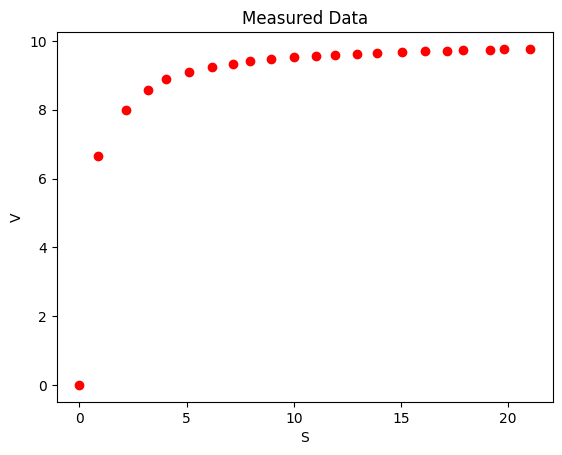

In [5]:
measuredData = pd.read_csv('Data/measuredData.csv', header=None, names = ["S", "V"])
S_data = measuredData["S"]
V_data = measuredData["V"]


plt.plot(S_data, V_data, 'ro')
plt.xlabel('S')
plt.ylabel('V')
plt.title('Measured Data')
plt.show()

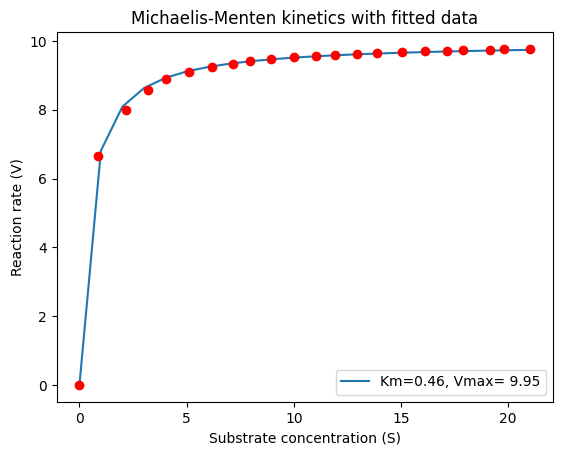

In [6]:
i = curve_fit(michaelis_menten, S_data, V_data, p0=[1, 1])
Km = i[0][0]
Vmax = i[0][1]
S_list = np.linspace(0, np.max(S_data), len(S_data))
V_list = michaelis_menten(S_list, Km, Vmax)
plt.plot(S_list, V_list, label=f'Km={np.round(Km, 2)}, Vmax= {np.round(Vmax, 2)}')
plt.plot(S_data, V_data, 'ro')
plt.legend()
plt.xlabel('Substrate concentration (S)')
plt.ylabel('Reaction rate (V)')
plt.title('Michaelis-Menten kinetics with fitted data')
plt.show()

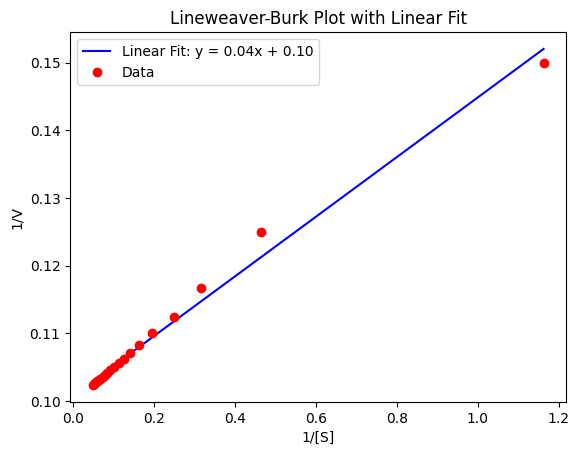

In [9]:
S_data_array = np.array(S_data)[1:]
V_data_array = np.array(V_data)[1:]

# Calculate reciprocals
reciprocal_S = 1 / S_data_array
reciprocal_V = 1 / V_data_array

# Fit a linear least squares line
slope, intercept = np.polyfit(reciprocal_S, reciprocal_V, 1)

# Plot the Lineweaver-Burk plot with the linear fit
plt.plot(reciprocal_S, slope * reciprocal_S + intercept, 'b-', label='Linear Fit: y = {:.2f}x + {:.2f}'.format(slope, intercept) )
plt.plot(reciprocal_S, reciprocal_V, 'ro', label='Data')
plt.xlabel('1/[S]')
plt.ylabel('1/V')
plt.title('Lineweaver-Burk Plot with Linear Fit')
plt.legend()
plt.show()

In the Lineweaver-Burk plot, we are plotting 1/V against 1/S. This transformation allows us to visualize the data in a linear form, facilitating the determination of Vmax and Km from the slope and intercept of the resulting line.

In [7]:
# Fit a linear function to the Lineweaver-Burk plot
def linear_function(x, a, b):
    return a + b * x

# Fit the data to the linear function
parameters = curve_fit(linear_function, 1/S_data_array, 1/V_data_array)

# Extract the y-intercept and slope
a, b = parameters[0]

# Calculate Vmax and Km from Lineweaver-Burk parameters
Vmax_lb = 1 / a
Km_lb = b * Vmax_lb

print("Vmax from Lineweaver-Burk plot:", Vmax_lb)
print("Km from Lineweaver-Burk plot:", Km_lb)

print("Vmax from Michaelis-Menten plot:", Vmax)
print("Km from Michaelis-Menten plot:", Km)

Vmax_difference = Vmax - Vmax_lb
Km_difference = Km - Km_lb

print("\nDifference in Vmax:", Vmax_difference)
print("Difference in Km:", Km_difference)

Vmax_percentage_difference = (Vmax_difference / Vmax) * 100
Km_percentage_difference = (Km_difference / Km) * 100

print("\nPercentage Difference in Vmax:", Vmax_percentage_difference)
print("Percentage Difference in Km:", Km_percentage_difference)




Vmax from Lineweaver-Burk plot: 9.916773247300549
Km from Lineweaver-Burk plot: 0.4367262413035133
Vmax from Michaelis-Menten plot: 9.953687379667791
Km from Michaelis-Menten plot: 0.4623630958442521

Difference in Vmax: 0.03691413236724195
Difference in Km: 0.02563685454073883

Percentage Difference in Vmax: 0.37085886826871567
Percentage Difference in Km: 5.544744978819558


(e) These small differences indicate that the values obtained from the Lineweaver-Burk plot are quite close to those obtained directly from the Michaelis-Menten plot. Generally, such small discrepancies can be attributed to the limitations of the experimental data or the fitting method used. Overall, the Lineweaver-Burk plot provides a reasonable estimation of the Michaelis-Menten parameters.

In summary, both the Michaelis-Menten plot and the Lineweaver-Burk plot provide valuable insights into enzyme kinetics and offer approaches to estimate the Michaelis-Menten parameters. Comparing results from both methods helps validate the accuracy of the obtained parameters and provides a robust analysis of enzyme kinetics data.

(f) The Lineweaver-Burk plot provides a simplified and linear representation of enzyme kinetics data, making it easier to analyze and interpret. By transforming the non-linear Michaelis-Menten equation into a linear form, the plot allows for straightforward estimation of Vmax and Km from the slope and y-intercept, respectively. This facilitates comparative analysis of different datasets and enhances data interpretation. However, the plot is sensitive to outliers and assumes linearity, which may lead to inaccuracies or overinterpretation of the data. Additionally, the transformation process involves taking reciprocals, potentially obscuring the original relationship between substrate concentration and reaction rate. Therefore, while the Lineweaver-Burk plot offers advantages in simplifying parameter estimation and visual analysis, we should be mindful of its limitations and exercise caution in interpretation.

## Question 3: Inhibitors

In [26]:
def mm_competitive(S_list, I, Ki, Km=1, Vmax=12):
    """
    This function takes a list of substrate concentrations, 
    a Michaelis-Menten constant, and a maximum reaction rate, 
    and returns a list of reaction rates.
    """
    V_list = []
    for S in S_list:
        V = (Vmax * S) / ((1+I/Ki)*Km + S)
        V_list.append(V)
    return V_list

def mm_uncompetitive(S_list, I, Ki, Km=1, Vmax=12):
    """
    This function takes a list of substrate concentrations, 
    a Michaelis-Menten constant, and a maximum reaction rate, 
    and returns a list of reaction rates.
    """
    V_list = []
    for S in S_list:
        V = (Vmax * S) / (Km + (1+I/Ki)*S)
        V_list.append(V)
    return V_list

def mm_noncompetitive(S_list, I, Ki, Km=1, Vmax=12):
    """
    This function takes a list of substrate concentrations, 
    a Michaelis-Menten constant, and a maximum reaction rate, 
    and returns a list of reaction rates.
    """
    V_list = []
    for S in S_list:
        V = (Vmax * S) / (1+I/Ki)*(Km + S)
        V_list.append(V)
    return V_list

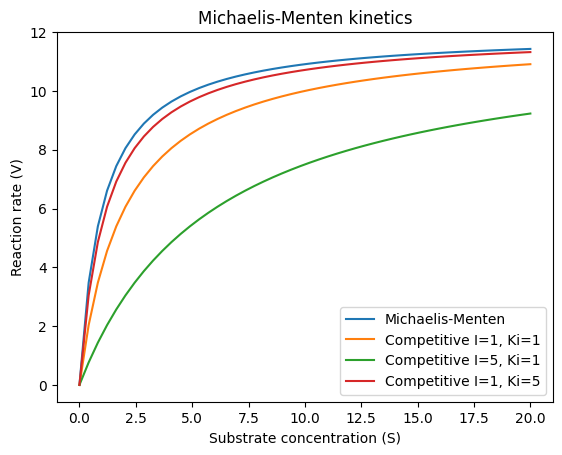

In [24]:
S_list = np.linspace(0, 20, 50)
V_list_1 = michaelis_menten(S_list, 1, 12)
V_list_2 = mm_competitive(S_list, 1, 1)
V_list_3 = mm_competitive(S_list, 5, 1)
V_list_4 = mm_competitive(S_list, 1, 5)


plt.plot(S_list, V_list_1, label='Michaelis-Menten')
plt.plot(S_list, V_list_2, label='Competitive I=1, Ki=1')
plt.plot(S_list, V_list_3, label='Competitive I=5, Ki=1')
plt.plot(S_list, V_list_4, label='Competitive I=1, Ki=5')
plt.legend()
plt.xlabel('Substrate concentration (S)')
plt.ylabel('Reaction rate (V)')
plt.title('Michaelis-Menten kinetics')
plt.show()

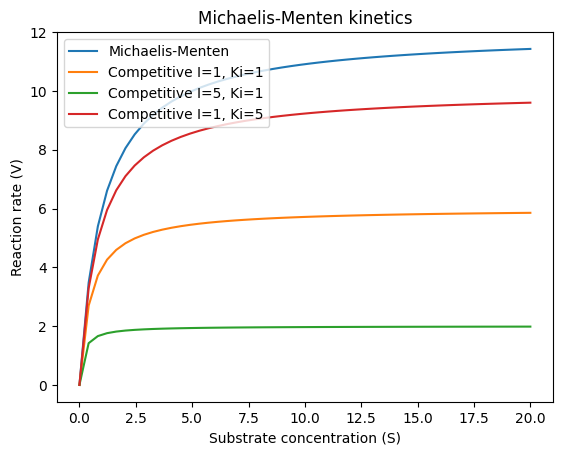

In [27]:
S_list = np.linspace(0, 20, 50)
V_list_1 = michaelis_menten(S_list, 1, 12)
V_list_2 = mm_uncompetitive(S_list, 1, 1)
V_list_3 = mm_uncompetitive(S_list, 5, 1)
V_list_4 = mm_uncompetitive(S_list, 1, 5)


plt.plot(S_list, V_list_1, label='Michaelis-Menten')
plt.plot(S_list, V_list_2, label='Competitive I=1, Ki=1')
plt.plot(S_list, V_list_3, label='Competitive I=5, Ki=1')
plt.plot(S_list, V_list_4, label='Competitive I=1, Ki=5')
plt.legend()
plt.xlabel('Substrate concentration (S)')
plt.ylabel('Reaction rate (V)')
plt.title('Michaelis-Menten kinetics')
plt.show()